In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr


In [30]:
flow_params = pd.read_csv("../results/LFR_DZ_CSTR/flow_parameters.csv", index_col=0)
flow_params = flow_params.drop('Unnamed: 9', axis=1)
flow_params = flow_params.drop('FLOW_RATE', axis=1)

In [31]:
doe = pd.read_csv('../data/CASE_PARAMETERS.csv', index_col=0)
doe

,COHORT,GEOMETRY,FLOW_RATE,PERC_DS,RAMP_ANGLE,VISCOUS_MODEL,ARTERIAL_VOLUME,TIMESTEP_SIZE,NO_TIMESTEPS
CASE_NUM,,,,,,,,,
1,1,1,4.00,20,30,TURBULENT,7.242360e-07,0.000512,1768.139778
2,1,1,3.75,20,30,TURBULENT,7.242360e-07,0.000546,1768.139778
3,1,1,3.50,20,30,TURBULENT,7.242360e-07,0.000585,1768.139778
4,1,1,3.25,20,30,TURBULENT,7.242360e-07,0.000630,1768.139778
5,1,1,3.00,20,30,TURBULENT,7.242360e-07,0.000683,1768.139778
...,...,...,...,...,...,...,...,...,...
266,1,18,1.50,70,60,TURBULENT,6.770090e-07,0.000192,11753.532650
267,1,18,1.25,70,60,TURBULENT,6.770090e-07,0.000230,11753.532650
268,1,18,1.00,70,60,TURBULENT,6.770090e-07,0.000288,11753.532650


In [32]:
df = pd.concat([doe, flow_params], axis=1)
df

,COHORT,GEOMETRY,FLOW_RATE,PERC_DS,RAMP_ANGLE,VISCOUS_MODEL,ARTERIAL_VOLUME,TIMESTEP_SIZE,NO_TIMESTEPS,alpha,beta,gamma,RAE,FLUENT_DEADZONE_VOLUME,LAMINAR_VOLUME,CSTSR_VOLUME
CASE_NUM,,,,,,,,,,,,,,,,
1,1,1,4.00,20,30,TURBULENT,7.242360e-07,0.000512,1768.139778,0.873867,0.052791,0.073342,0.066495,2.550000e-09,7.240000e-07,0.000000e+00
2,1,1,3.75,20,30,TURBULENT,7.242360e-07,0.000546,1768.139778,0.874053,0.053326,0.072621,0.066761,2.330000e-09,7.240000e-07,0.000000e+00
3,1,1,3.50,20,30,TURBULENT,7.242360e-07,0.000585,1768.139778,0.873962,0.053693,0.072345,0.066861,2.120000e-09,7.240000e-07,0.000000e+00
4,1,1,3.25,20,30,TURBULENT,7.242360e-07,0.000630,1768.139778,0.873748,0.054542,0.071711,0.067161,1.890000e-09,7.240000e-07,0.000000e+00
5,1,1,3.00,20,30,TURBULENT,7.242360e-07,0.000683,1768.139778,0.874027,0.055053,0.070920,0.067241,1.620000e-09,7.240000e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1,18,1.50,70,60,TURBULENT,6.770090e-07,0.000192,11753.532650,0.836174,0.113284,0.050542,0.132367,1.100000e-07,5.110000e-07,1.660000e-07
267,1,18,1.25,70,60,TURBULENT,6.770090e-07,0.000230,11753.532650,0.806556,0.114929,0.078515,0.154604,1.140000e-07,5.350000e-07,1.420000e-07
268,1,18,1.00,70,60,TURBULENT,6.770090e-07,0.000288,11753.532650,0.736406,0.106830,0.156764,0.210463,1.330000e-07,5.710000e-07,1.060000e-07


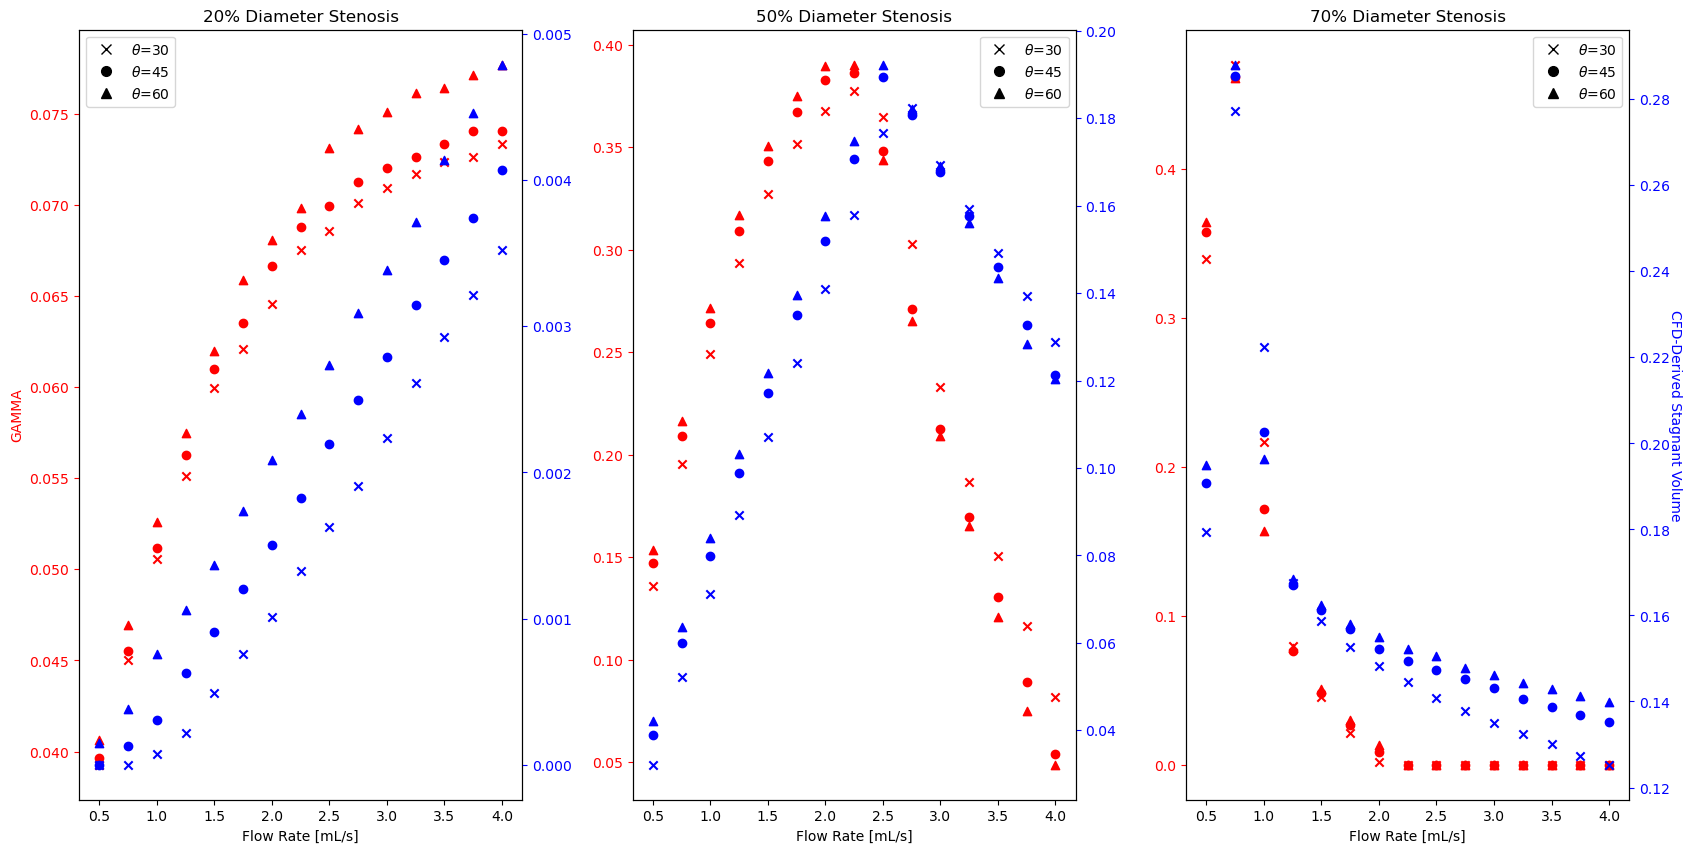

In [33]:
# GAMMA AND CFD DEADZONE VOLUME VERSUS FLOW RATE
import matplotlib.lines as mlines

# Create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}



## 20% DS Subplot
df_ds20 = df[df['PERC_DS']==20]

# Create second y axis for fluent DZ volume plotting
ax0 = ax[0].twinx()

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].FLOW_RATE, 
                  df_ds20[df_ds20['RAMP_ANGLE']==angle].gamma, 
                  c='r', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax0.scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].FLOW_RATE, 
                df_ds20[df_ds20['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                / df_ds20[df_ds20['RAMP_ANGLE']==angle].ARTERIAL_VOLUME,
                c='b', marker=marker_dict[angle])

# Set style of the axes
ax[0].set_xlabel('Flow Rate [mL/s]')
ax[0].set_ylabel('GAMMA', color='red')
ax[0].tick_params(axis='y', colors='red')
ax[0].set_title('20% Diameter Stenosis')

ax0.tick_params(axis='y', colors='blue')

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)



## 50% DS Plot
df_ds50 = df[df['PERC_DS']==50]

# Create second y axis for fluent DZ volume plotting
ax1 = ax[1].twinx()

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].FLOW_RATE, 
                  df_ds50[df_ds50['RAMP_ANGLE']==angle].gamma, 
                  c='r', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax1.scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].FLOW_RATE, 
                df_ds50[df_ds50['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                / df_ds50[df_ds50['RAMP_ANGLE']==angle].ARTERIAL_VOLUME,
                c='b', marker=marker_dict[angle])

# Set style of the axes
ax[1].set_xlabel('Flow Rate [mL/s]')
ax[1].tick_params(axis='y', colors='red')
ax[1].set_title('50% Diameter Stenosis')

ax1.tick_params(axis='y', colors='blue')

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)



## 50% DS Plot
df_ds70 = df[df['PERC_DS']==70]

# Create second y axis for fluent DZ volume plotting
ax2 = ax[2].twinx()

# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[2].scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].FLOW_RATE, 
                  df_ds70[df_ds70['RAMP_ANGLE']==angle].gamma, 
                  c='r', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax2.scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].FLOW_RATE, 
                df_ds70[df_ds70['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                / df_ds70[df_ds70['RAMP_ANGLE']==angle].ARTERIAL_VOLUME,
                c='b', marker=marker_dict[angle])

# Set style of the axes
ax[2].set_xlabel('Flow Rate [mL/s]')
ax[2].tick_params(axis='y', colors='red')
ax[2].set_title('70% Diameter Stenosis')

ax2.set_ylabel('CFD-Derived Stagnant Volume', color='blue', rotation=-90, labelpad=9)
ax2.tick_params(axis='y', colors='blue')

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[2].legend(handles=legend_handle)


# Adjust whitespace in between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)
plt.show()


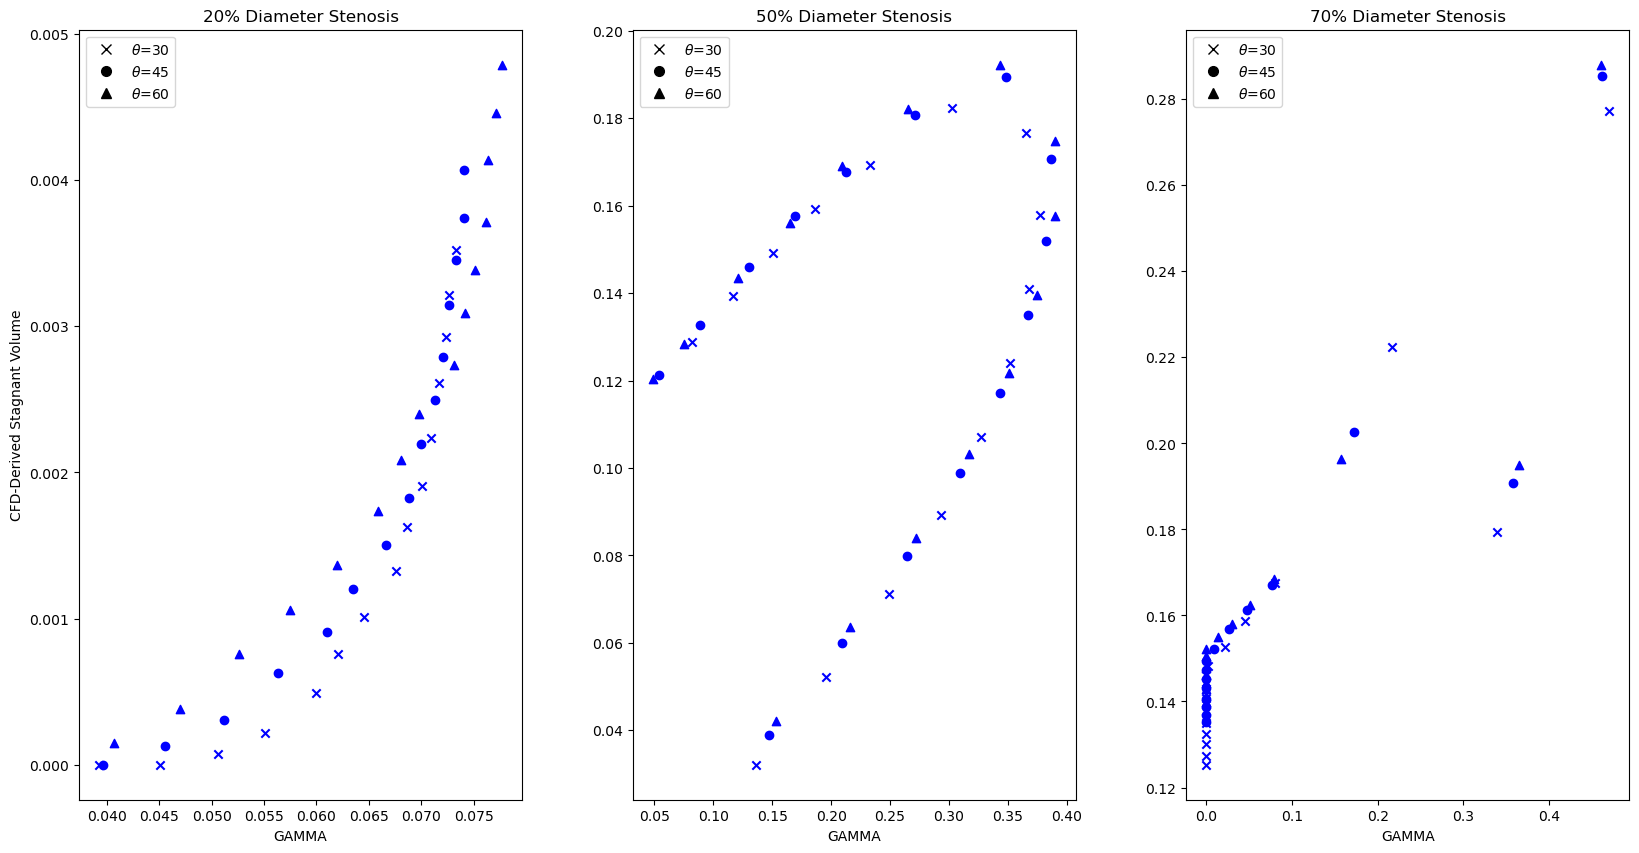

In [34]:
# GAMMA VERSUS CFD DEADZONE VOLUME 
import matplotlib.lines as mlines

# Create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}



## 20% DS Subplot
df_ds20 = df[df['PERC_DS']==20]


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].gamma,
                  df_ds20[df_ds20['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds20[df_ds20['RAMP_ANGLE']==angle].ARTERIAL_VOLUME, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[0].set_xlabel('GAMMA')
ax[0].set_ylabel('CFD-Derived Stagnant Volume')
ax[0].tick_params(axis='y')
ax[0].set_title('20% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)



## 50% DS Subplot
df_ds50 = df[df['PERC_DS']==50]


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].gamma,
                  df_ds50[df_ds50['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds50[df_ds50['RAMP_ANGLE']==angle].ARTERIAL_VOLUME, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[1].set_xlabel('GAMMA')
ax[1].set_title('50% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)



## 50% DS Subplot
df_ds70 = df[df['PERC_DS']==70]


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[2].scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].gamma,
                  df_ds70[df_ds70['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds70[df_ds70['RAMP_ANGLE']==angle].ARTERIAL_VOLUME, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[2].set_xlabel('GAMMA')
ax[2].set_title('70% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[2].legend(handles=legend_handle)


# Adjust whitespace in between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)
plt.show()


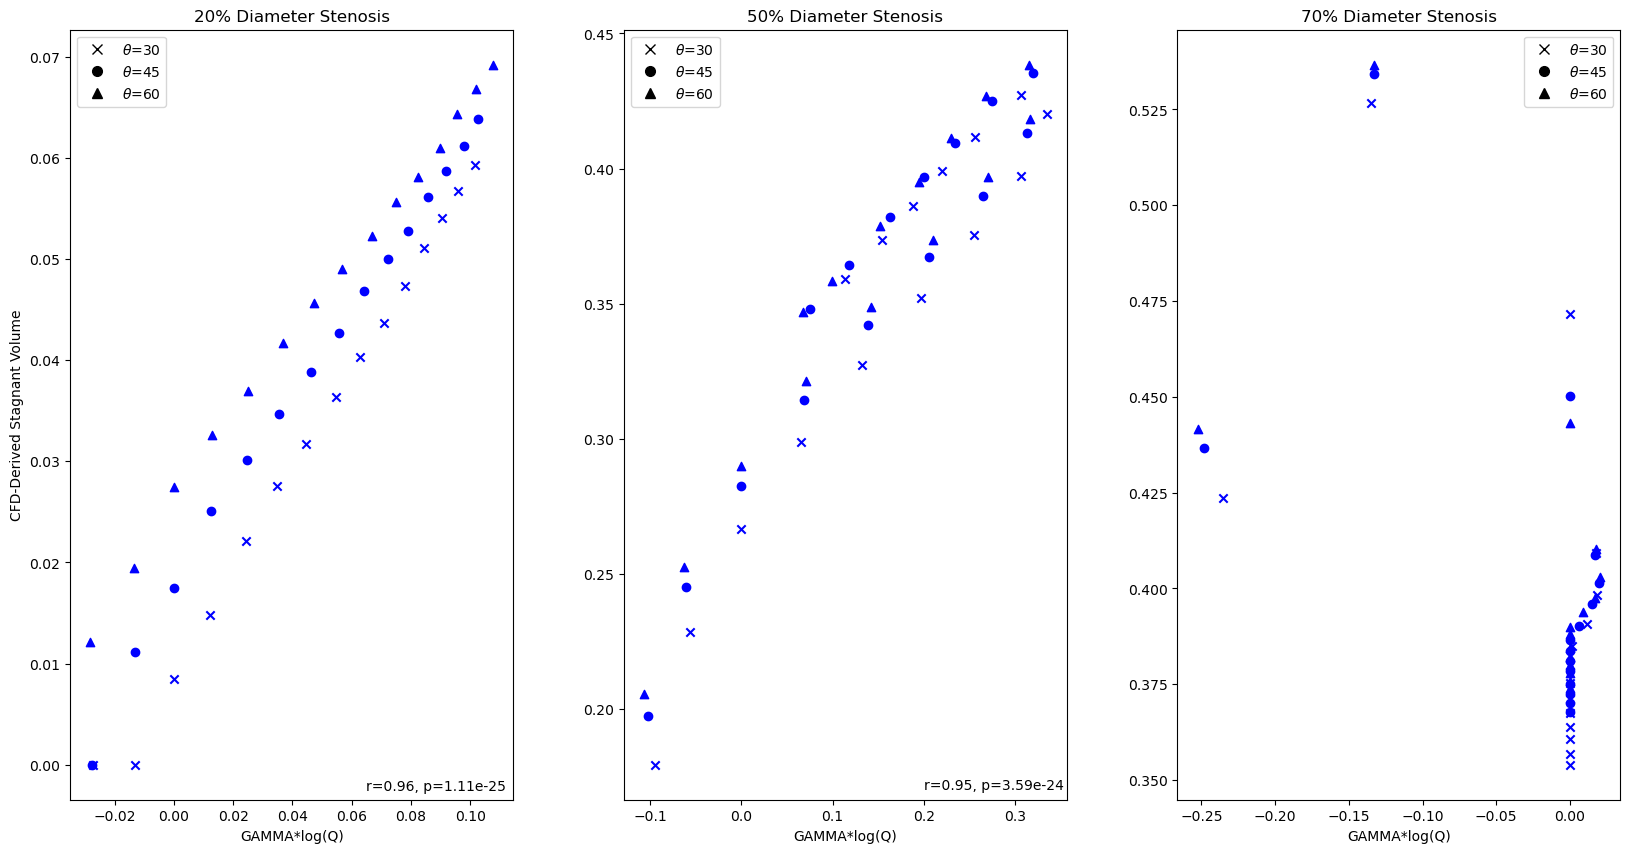

In [35]:
# GAMMA VERSUS CFD DEADZONE VOLUME 
import matplotlib.lines as mlines

# Create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}



## 20% DS Subplot
df_ds20 = df[df['PERC_DS']==20]
df_ds50 = df[df['PERC_DS']==50]
df_ds70 = df[df['PERC_DS']==70]


# Calculate statistics to evaluate strength of relationship
r20 = pearsonr(df_ds20.gamma*-np.log(1/df_ds20.FLOW_RATE), 
              (df_ds20.FLUENT_DEADZONE_VOLUME / df_ds20.ARTERIAL_VOLUME)**0.5)
r50 = pearsonr(df_ds50.gamma*-np.log(1/df_ds50.FLOW_RATE), 
              (df_ds50.FLUENT_DEADZONE_VOLUME / df_ds50.ARTERIAL_VOLUME)**0.5)
r70 = pearsonr(df_ds70.gamma*-np.log(1/df_ds70.FLOW_RATE), 
              (df_ds70.FLUENT_DEADZONE_VOLUME / df_ds70.ARTERIAL_VOLUME)**0.5)


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df_ds20[df_ds20['RAMP_ANGLE']==angle].gamma*-np.log(1/df_ds20[df_ds20['RAMP_ANGLE']==angle].FLOW_RATE),
                  (df_ds20[df_ds20['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds20[df_ds20['RAMP_ANGLE']==angle].ARTERIAL_VOLUME)**0.5, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[0].set_xlabel('GAMMA*log(Q)')
ax[0].set_ylabel('CFD-Derived Stagnant Volume')
ax[0].tick_params(axis='y')
ax[0].set_title('20% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)
ax[0].text(0.065, -0.0025, 'r={:.2f}, p={:.2e}'.format(r20[0], r20[1]))



## 50% DS Subplot


# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df_ds50[df_ds50['RAMP_ANGLE']==angle].gamma*-np.log(1/df_ds50[df_ds50['RAMP_ANGLE']==angle].FLOW_RATE),
                  (df_ds50[df_ds50['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds50[df_ds50['RAMP_ANGLE']==angle].ARTERIAL_VOLUME)**0.5, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[1].set_xlabel('GAMMA*log(Q)')
ax[1].set_title('50% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)
ax[1].text(0.20, 0.17, 'r={:.2f}, p={:.2e}'.format(r50[0], r50[1]))



## 70% DS Subplot



# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[2].scatter(df_ds70[df_ds70['RAMP_ANGLE']==angle].gamma*-np.log(1/df_ds70[df_ds70['RAMP_ANGLE']==angle].FLOW_RATE),
                  (df_ds70[df_ds70['RAMP_ANGLE']==angle].FLUENT_DEADZONE_VOLUME \
                  / df_ds70[df_ds70['RAMP_ANGLE']==angle].ARTERIAL_VOLUME)**0.5, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))


# Set style of the axes
ax[2].set_xlabel('GAMMA*log(Q)')
ax[2].set_title('70% Diameter Stenosis')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[2].legend(handles=legend_handle)
# ax[2].text(-0.2, 0.350, 'r={:.2f}, p={:.3e}'.format(r70[0], r70[1]))


# Adjust whitespace in between subplots
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)
plt.show()


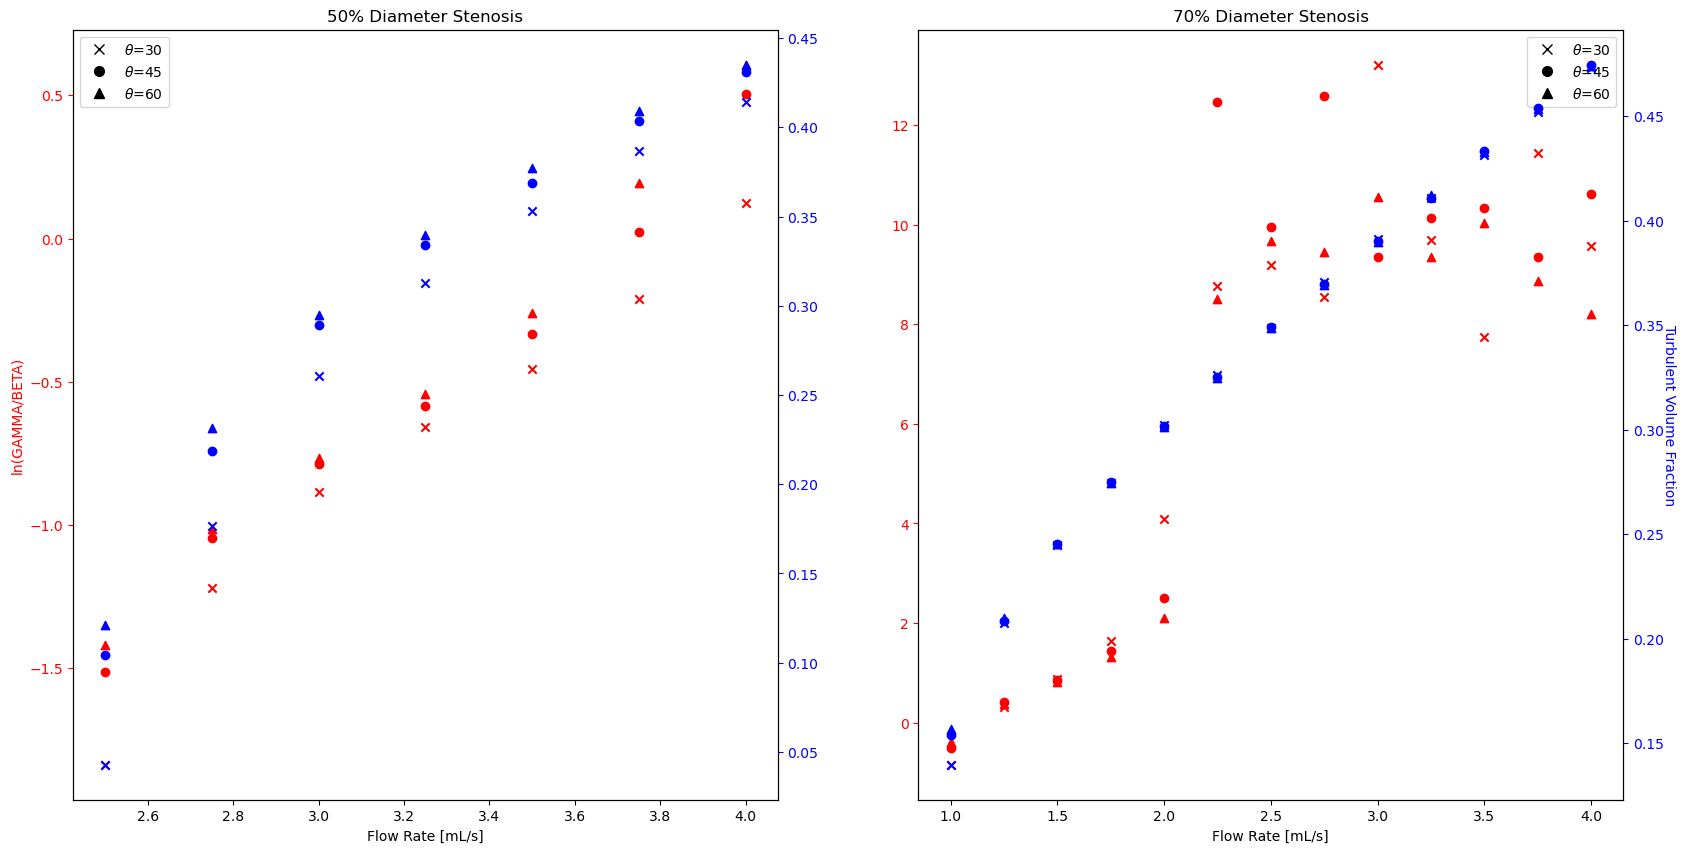

In [36]:
## BETA/GAMMA AND TURBULENT VOLUME VERSUS FLOW RATE

## BETA/GAMMA VS TURBULENT VOLUME

# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}

df['BETA/GAMMA'] = df['beta'] / df['gamma']
df['TURBULENT_VOLUME_FRACTION'] = df['CSTSR_VOLUME'] / df['ARTERIAL_VOLUME']
df_TI = df[df['CSTSR_VOLUME'] > 0]


# Create slices of data based on %DS
df50 = df_TI[df_TI['PERC_DS']==50]
df70 = df_TI[df_TI['PERC_DS']==70]

# Create twin axes for seconday y axes
ax0_twin = ax[0].twinx()
ax1_twin = ax[1].twinx()



# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(df50[df50['RAMP_ANGLE']==angle].FLOW_RATE,
                  np.log(df50[df50['RAMP_ANGLE']==angle]["BETA/GAMMA"]), 
                  c='red', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax0_twin.scatter(df50[df50['RAMP_ANGLE']==angle].FLOW_RATE,
                  df50[df50['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='blue', marker=marker_dict[angle])
    



# Set style of the axes
ax[0].set_xlabel('Flow Rate [mL/s]')
ax[0].set_ylabel('ln(GAMMA/BETA)', color='red')
ax[0].tick_params(axis='y', colors='red')
ax[0].set_title('50% Diameter Stenosis')

ax0_twin.tick_params(axis='y', colors='blue')


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)




# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(df70[df70['RAMP_ANGLE']==angle].FLOW_RATE,
                  np.log(df70[df70['RAMP_ANGLE']==angle]["BETA/GAMMA"]), 
                  c='red', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    ax1_twin.scatter(df70[df70['RAMP_ANGLE']==angle].FLOW_RATE,
                  df70[df70['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='blue', marker=marker_dict[angle])
    



# Set style of the axes
ax[1].set_xlabel('Flow Rate [mL/s]')
ax[1].tick_params(axis='y', colors='red')
ax[1].set_title('70% Diameter Stenosis')

ax1_twin.tick_params(axis='y', colors='blue')
ax1_twin.set_ylabel('Turbulent Volume Fraction', rotation=-90, color='blue', labelpad=9)


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle)

plt.show()


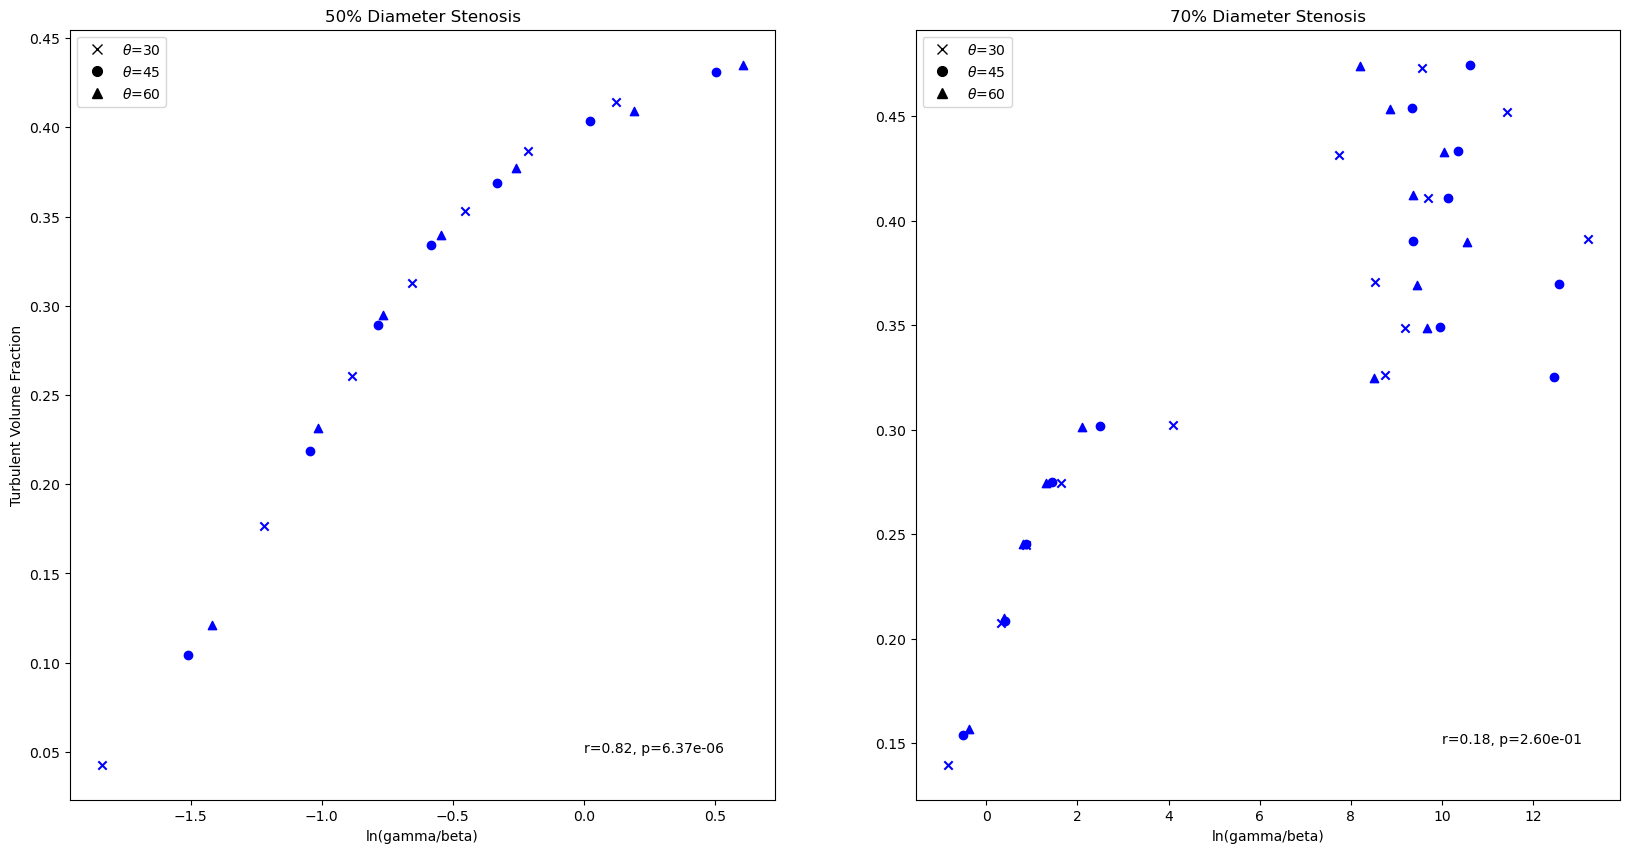

In [37]:
## BETA/GAMMA VS TURBULENT VOLUME

# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# Marker dictionary for segmenting by ramp angle
marker_dict = {30: 'x', 45: 'o', 60: '^'}

df['BETA/GAMMA'] = df['beta'] / df['gamma']
df['TURBULENT_VOLUME_FRACTION'] = df['CSTSR_VOLUME'] / df['ARTERIAL_VOLUME']
df_TI = df[df['CSTSR_VOLUME'] > 0]


# Create slices of data based on %DS
df50 = df_TI[df_TI['PERC_DS']==50]
df70 = df_TI[df_TI['PERC_DS']==70]

# Calculate statistics to evaluate strength of relationship
r50 = pearsonr(df50['BETA/GAMMA'], df50.TURBULENT_VOLUME_FRACTION)
r70 = pearsonr(df70['BETA/GAMMA'], df70.TURBULENT_VOLUME_FRACTION)



# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[0].scatter(np.log(df50[df50['RAMP_ANGLE']==angle]["BETA/GAMMA"]),
                  df50[df50['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))
    



# Set style of the axes
ax[0].set_xlabel('ln(gamma/beta)')
ax[0].set_ylabel('Turbulent Volume Fraction')
ax[0].tick_params(axis='y')
ax[0].set_title('50% Diameter Stenosis')
ax[0].text(0.0, 0.05, 'r={:.2f}, p={:.2e}'.format(r50[0], r50[1]))

# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[0].legend(handles=legend_handle)




# Loop through each ramp angle for plotting as different marker types
for angle in marker_dict.keys():
    ax[1].scatter(np.log(df70[df70['RAMP_ANGLE']==angle]["BETA/GAMMA"]),
                  df70[df70['RAMP_ANGLE']==angle].TURBULENT_VOLUME_FRACTION, 
                  c='blue', marker=marker_dict[angle], 
                  label=r'$\theta$ = {}'.format(angle))




# Set style of the axes
ax[1].set_xlabel('ln(gamma/beta)')
ax[1].tick_params(axis='y')
ax[1].set_title('70% Diameter Stenosis')
ax[1].text(10, 0.15, 'r={:.2f}, p={:.2e}'.format(r70[0], r70[1]))


# Create a custom legend handle 
legend_handle = [mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=7, label=r'$\theta$=30'),
                 mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label=r'$\theta$=45'),
                 mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=7, label=r'$\theta$=60')]
ax[1].legend(handles=legend_handle, loc='upper left')


plt.show()





In [38]:
labels = [x for x in range(141, 144)]

e_dir = "..\data\Etheta_curves"

paths = [path.join(e_dir, f"sim{sim_num}.csv") for sim_num in labels]

plt.figure()
for i, rtd_path in enumerate(paths):
    e_theta = pd.read_csv(rtd_path, index_col=0)
    mode = e_theta[e_theta.Et == e_theta.Et.max()].time.item()
    shift = 0.5 - mode
    plt.plot(e_theta.time + shift, e_theta.Et, label=f'sim{i+141}')

X = np.linspace(0, 5, 1000)
Y = [0 if x < 0.5 else 1/2/x**3 for x in X]
plt.plot(X, Y, label='Hagen-Pouiseille')
plt.xlim(0.35, 1.5)
# plt.ylim(1.5, 3)
plt.legend()
plt.show()

NameError: name 'path' is not defined

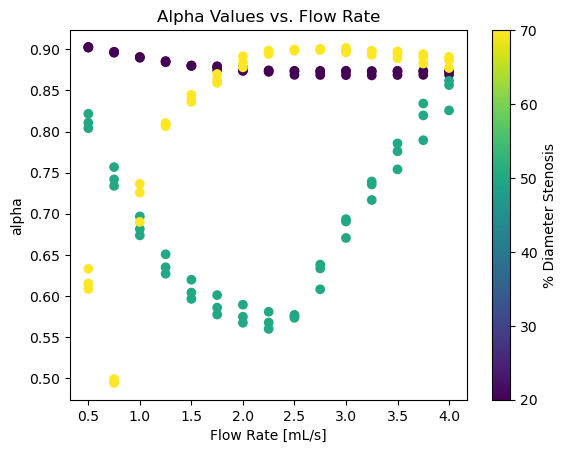

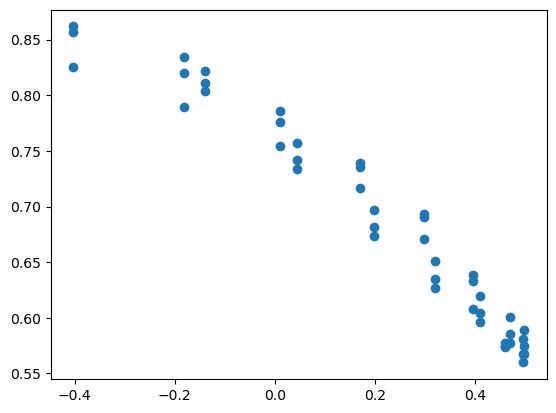

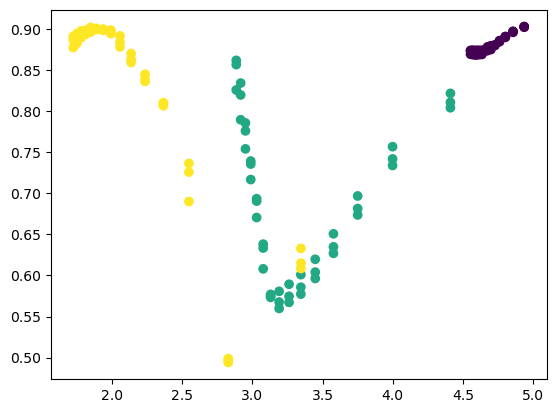

In [ ]:
df['DR'] = (100 - df.PERC_DS)/100

fig, ax = plt.subplots()
sc = ax.scatter(df.FLOW_RATE, df['alpha'], c=df.PERC_DS)
plt.xlabel('Flow Rate [mL/s]')
plt.ylabel('alpha')
cbar = fig.colorbar(sc)
cbar.set_label('% Diameter Stenosis')
plt.title('Alpha Values vs. Flow Rate')
plt.show()

fig, ax = plt.subplots()
ax.scatter(-(df[df['PERC_DS']==50].DR/2)*(df[df['PERC_DS']==50].FLOW_RATE - 2.1)**2 + df[df['PERC_DS']==50].DR, df[df['PERC_DS']==50]['alpha'])
plt.show()


fig, ax = plt.subplots()
a = -0.2
b = 0
ax.scatter(1/(a*np.log(1-(df.PERC_DS/100)**2)*np.log(df.FLOW_RATE) - a/(1 - (df.PERC_DS/100)**2) + b), df.alpha, c=df.PERC_DS)
plt.show()

# pearsonr(df[df['PERC_DS']==20].FLOW_RATE, df[df['PERC_DS']==20].alpha)

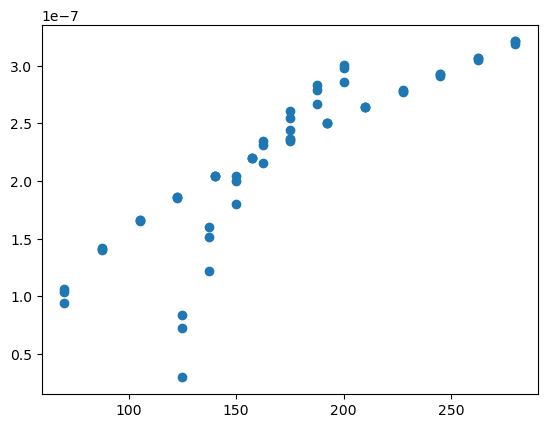

In [45]:
fig, ax = plt.subplots()

X = df[df.CSTSR_VOLUME > 0].FLOW_RATE * df[df.CSTSR_VOLUME > 0].PERC_DS
Y = df[df.CSTSR_VOLUME > 0].CSTSR_VOLUME

ax.scatter(X, Y)
plt.show()